In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [ ]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)

In [ ]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
df = df.select_dtypes(exclude=['object'])

In [ ]:
#Buscar nulos
df.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [ ]:
#Borrado de datos nulos
df = df.dropna()
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


<Axes: >

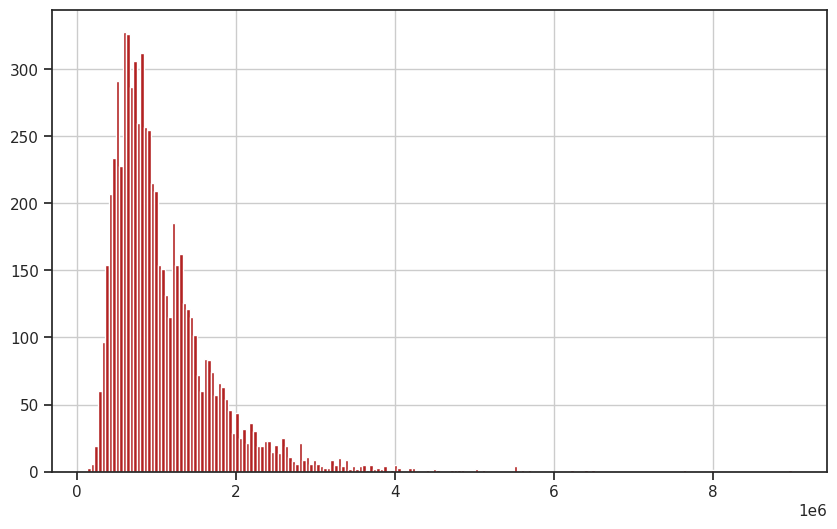

In [ ]:
#Histograma
df.Price.hist(color='firebrick', bins=200, figsize=(10, 6))

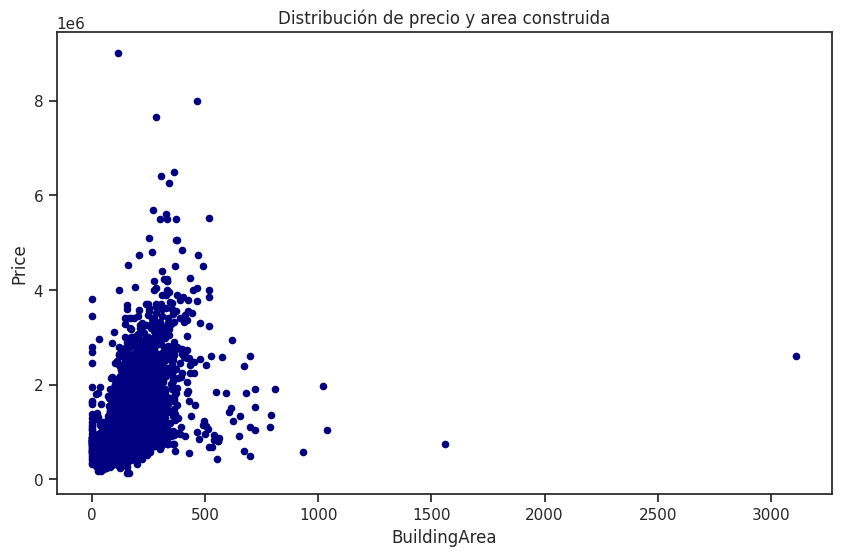

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [ ]:
#Datos con área menor o igual a 800
df0 = df[df["BuildingArea"]<=800]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


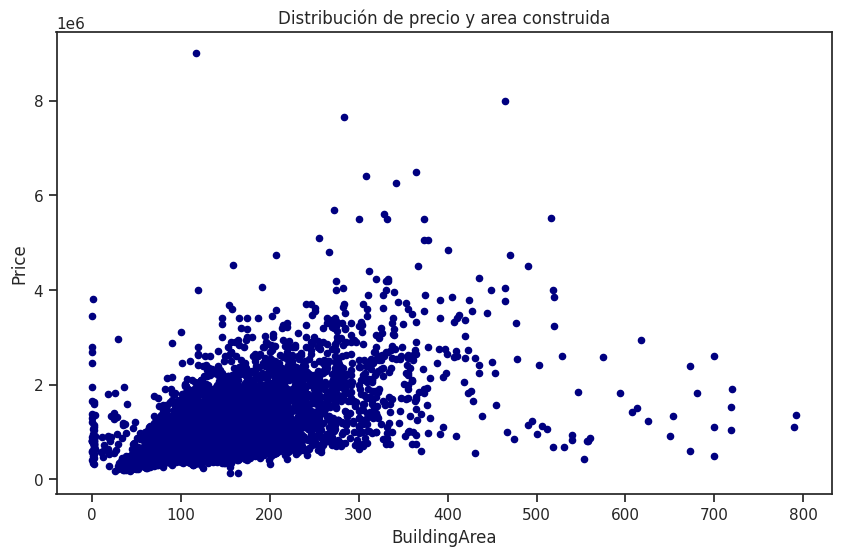

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [ ]:
#Datos con área cero
dfzero = df0[df0["BuildingArea"]<=15]
len(dfzero)

56

In [ ]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
df0 = df0[df0["BuildingArea"]>4]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [ ]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
df0 = df0[(np.abs(zscore(df0['BuildingArea']))<=3)]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


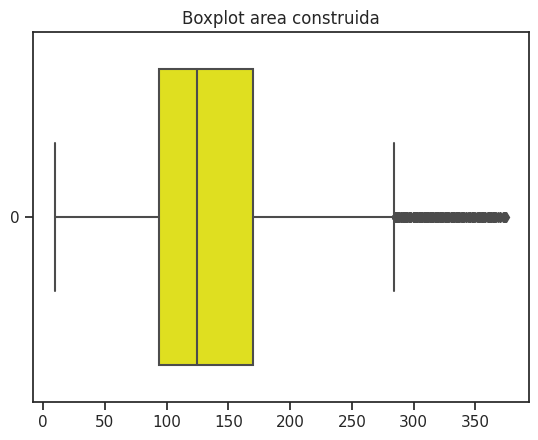

In [ ]:
#Boxplot
ax = sb.boxplot(data=df0['BuildingArea'].values, orient='h', color='yellow')
ax.set_title('Boxplot area construida');
plt.show()

In [ ]:
#Correlación entre variables
corr_test = pearsonr(x = df['BuildingArea'], y = df['Price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.5204915813803511
P-value:  0.0


<Axes: title={'center': 'Pearson Correlation of Features'}>

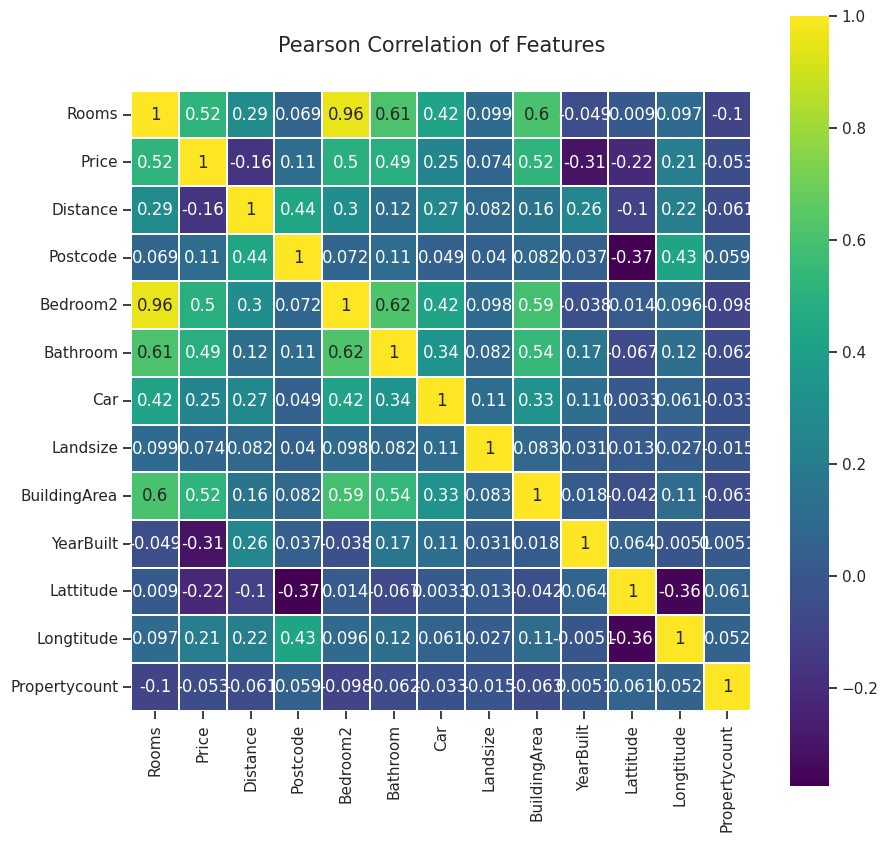

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
df0[df0["Landsize"]==0].count()

Rooms            1007
Price            1007
Distance         1007
Postcode         1007
Bedroom2         1007
Bathroom         1007
Car              1007
Landsize         1007
BuildingArea     1007
YearBuilt        1007
Lattitude        1007
Longtitude       1007
Propertycount    1007
dtype: int64

Text(0.5, 1.0, 'Distribución de precio y area construida')

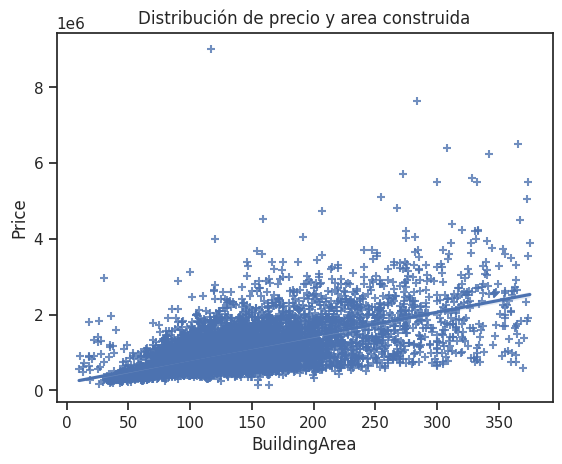

In [ ]:
sb.set_theme(color_codes=True)
sb.set_theme(style="ticks")
ax = sb.regplot(x="BuildingArea", y="Price", data=df0, marker='+', x_jitter=0.2, y_jitter=0.2)
ax.set_title('Distribución de precio y area construida')

In [ ]:
#sb.pairplot(df0, kind='reg')

In [ ]:
#Regresión lineal (Area construida vs. Precio)
x = df0["BuildingArea"]
y = df0["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     4315.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:58:01   Log-Likelihood:                -97109.
No. Observations:                6678   AIC:                         1.942e+05
Df Residuals:                    6676   BIC:                         1.942e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.987e+05   1.45e+04     13.732   

In [ ]:
df0 = df0.drop(['Bedroom2', 'Postcode', 'Lattitude', 'Longtitude'], axis=1)

In [ ]:
df0.dtypes

Rooms              int64
Price            float64
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
dtype: object

In [ ]:
#Regresión lineal múltiple
x = df0.iloc[:,[0,3,6]]
y = df0["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     1465.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:58:02   Log-Likelihood:                -97084.
No. Observations:                6678   AIC:                         1.942e+05
Df Residuals:                    6674   BIC:                         1.942e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.114e+05   2.05e+04      5.442   

In [ ]:
import pandas as pd
import statsmodels.api as sfrom itertools import combinations

# Supongamos que df0 es tu DataFrame y contiene las columnas necesarias
# x = df0.iloc[:,[0,3,6]]
# y = df0["Price"]

# Crear una lista de nombres de columnas que deseas considerar
column_names = df0.columns.tolist()  # Esto asume que df0 es tu DataFrame

# Eliminar la columna objetivo de la lista de nombres de columnas
column_names.remove("Price")

# Crear una lista para almacenar los resultados de R-squared
results = []

# Generar todas las combinaciones posibles de columnas (de longitud 1 a la longitud total)
for r in range(1, len(column_names) + 1):
    for combo in combinations(column_names, r):
        x = df0[list(combo)]  # Seleccionar las columnas de la combinación actual
        x = sm.add_constant(x)
        est = sm.OLS(y, x)
        est2 = est.fit()
        results.append((combo, est2.rsquared))

# Ordenar los resultados por R-squared en orden descendente
results.sort(key=lambda x: x[1], reverse=True)

# Imprimir los resultados
for combo, rsquared in results:
    print(f"Columns: {combo}, R-squared: {rsquared}")

Columns: ('Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount'), R-squared: 0.5805279136301362
Columns: ('Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt'), R-squared: 0.5805274792100296
Columns: ('Rooms', 'Distance', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'Propertycount'), R-squared: 0.580044580577285
Columns: ('Rooms', 'Distance', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt'), R-squared: 0.5800440888019944
Columns: ('Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount'), R-squared: 0.5796617377680306
Columns: ('Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt'), R-squared: 0.5796585541671236
Columns: ('Distance', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'Propertycount'), R-squared: 0.5791680798198018
Columns: ('Distance', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt'), R-squared: 0.5791647176263712
Columns: ('Rooms', 'Distance', 'Bathroom'

In [ ]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations

# Supongamos que df0 es tu DataFrame y contiene las columnas necesarias
# x = df0.iloc[:,[0,3,6]]
# y = df0["Price"]

# Crear una lista de nombres de columnas que deseas considerar
column_names = df0.columns.tolist()  # Esto asume que df0 es tu DataFrame

# Eliminar la columna objetivo de la lista de nombres de columnas
column_names.remove("Price")

# Crear una lista para almacenar los resultados de R-squared
results = []

# Generar todas las combinaciones posibles de 3 columnas
for combo in combinations(column_names, 3):
    x = df0[list(combo)]  # Seleccionar las columnas de la combinación actual
    x = sm.add_constant(x)
    est = sm.OLS(y, x)
    est2 = est.fit()
    results.append((combo, est2.rsquared))

# Ordenar los resultados por R-squared en orden descendente
results.sort(key=lambda x: x[1], reverse=True)

# Imprimir los resultados
for combo, rsquared in results:
    print(f"Columns: {combo}, R-squared: {rsquared}")


Columns: ('Distance', 'BuildingArea', 'YearBuilt'), R-squared: 0.5636921831256387
Columns: ('Bathroom', 'BuildingArea', 'YearBuilt'), R-squared: 0.5304110795660826
Columns: ('Car', 'BuildingArea', 'YearBuilt'), R-squared: 0.5142765062005443
Columns: ('Landsize', 'BuildingArea', 'YearBuilt'), R-squared: 0.5141650768203895
Columns: ('BuildingArea', 'YearBuilt', 'Propertycount'), R-squared: 0.5140549720734297
Columns: ('Rooms', 'BuildingArea', 'YearBuilt'), R-squared: 0.5139892089590867
Columns: ('Rooms', 'Distance', 'BuildingArea'), R-squared: 0.49866640008286
Columns: ('Distance', 'Bathroom', 'BuildingArea'), R-squared: 0.48877533430628883
Columns: ('Distance', 'Car', 'BuildingArea'), R-squared: 0.4876183797175603
Columns: ('Distance', 'Landsize', 'BuildingArea'), R-squared: 0.4864519269400074
Columns: ('Distance', 'BuildingArea', 'Propertycount'), R-squared: 0.48596549806036493
Columns: ('Rooms', 'Bathroom', 'YearBuilt'), R-squared: 0.4246726526984034
Columns: ('Rooms', 'Distance', 'Ye